<a href="https://colab.research.google.com/github/daviduzy/insight-from-failed-orders/blob/main/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np


In [108]:
orders=pd.read_csv('data_orders.csv')

In [109]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [110]:
offers=pd.read_csv('data_offers.csv')

In [111]:
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [112]:
df=orders.merge(right=offers,how='inner', on='order_gk')

In [113]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


In [114]:
df['order_status']=np.where(df['order_status_key']==4, 'Client Cancelled','System Cancelled')

In [115]:
df['is_driver_assigned']=np.where(df['is_driver_assigned_key']==1, 'Yes', 'No')

In [116]:
df.drop(columns=['is_driver_assigned_key', 'order_status_key'])

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,order_status,is_driver_assigned
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Client Cancelled,Yes
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,Client Cancelled,No
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,Client Cancelled,No
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,Client Cancelled,No
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Client Cancelled,Yes
...,...,...,...,...,...,...,...,...,...
31263,12:44:11,-0.975372,51.457846,NaN,3000597886155,43.0,300051590196,Client Cancelled,No
31264,12:42:52,-0.975372,51.457846,NaN,3000597886140,44.0,300051590176,Client Cancelled,No
31265,13:11:35,-0.975372,51.457846,NaN,3000599186906,36.0,300051648809,Client Cancelled,No
31266,13:17:21,-0.972926,51.457693,60.0,3000599187034,34.0,300051648910,Client Cancelled,Yes


In [117]:
df_1=df.groupby(by=['is_driver_assigned', 'order_status'])['order_gk'].count()

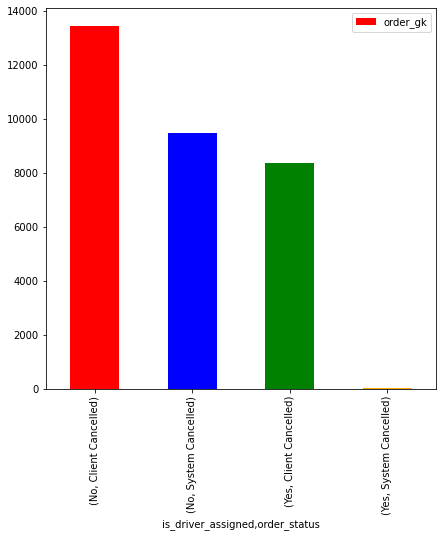

In [118]:
df_1.plot(kind='bar',figsize=(7,7), legend=True, color=['red','blue','green','orange'])

In [119]:
df["order_hour"]=df["order_datetime"].str.split(":").apply(lambda split:split[0])

In [120]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,order_status,is_driver_assigned,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403,Client Cancelled,Yes,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179,Client Cancelled,No,20
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174,Client Cancelled,No,20
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180,Client Cancelled,No,20
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275,Client Cancelled,Yes,12


In [121]:
df_3=df.groupby(by=['order_hour'])['order_gk'].count()

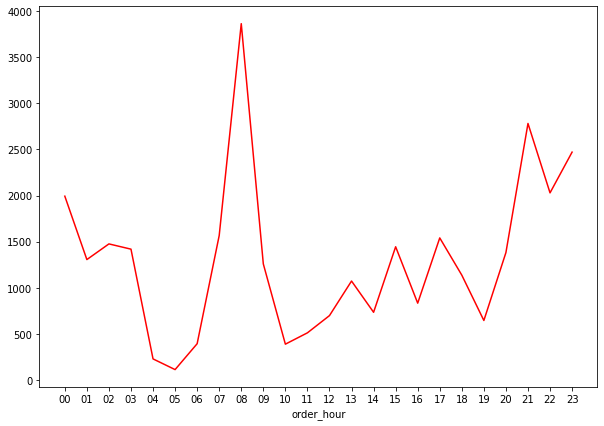

In [122]:
df_3.plot(kind='line', figsize=(10,7),color=['red','blue'], xticks=range(0,24))

In [123]:
df_4=df.groupby(by=['order_hour', 'is_driver_assigned','order_status' ])['order_gk'].count()

In [124]:
df_5=df_4.reset_index().pivot(index='order_hour', columns=['is_driver_assigned', 'order_status'], values='order_gk')

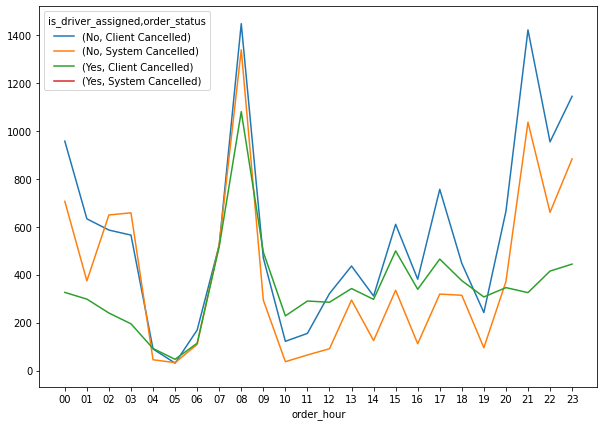

In [125]:
df_5.plot(kind='line', figsize=(10,7), xticks=range(0,24))

In [126]:
df_6=df.groupby(by=['order_hour', 'is_driver_assigned'])['cancellations_time_in_seconds'].mean()

In [127]:
df_6

order_hour  is_driver_assigned
00          No                    115.126437
            Yes                   276.082822
01          No                    100.593997
            Yes                   296.312081
02          No                    121.305461
            Yes                   301.466667
03          No                    129.182301
            Yes                   368.682051
04          No                    100.733333
            Yes                   245.250000
05          No                    102.838710
            Yes                   156.617021
06          No                    202.952663
            Yes                   225.508772
07          No                    141.177820
            Yes                   177.640232
08          No                    132.625432
            Yes                   172.896296
09          No                    138.014894
            Yes                   230.821862
10          No                     93.795082
            Yes         

In [128]:
df_7=df_6.reset_index().pivot(index='order_hour', columns='is_driver_assigned',values='cancellations_time_in_seconds')

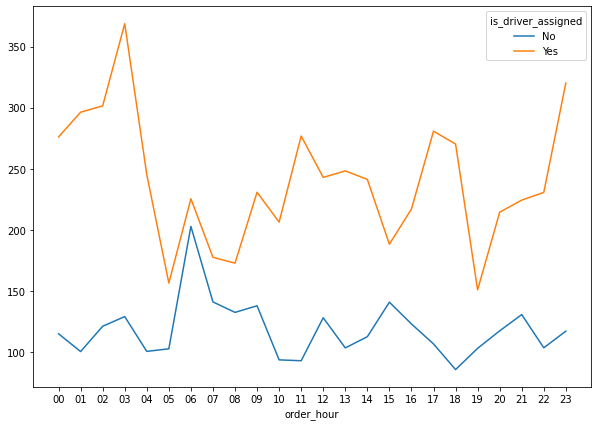

In [129]:
df_7.plot(kind='line', figsize=(10,7), xticks=range(0,24))

In [130]:
df_8=df.groupby(by='order_hour')['m_order_eta'].mean()

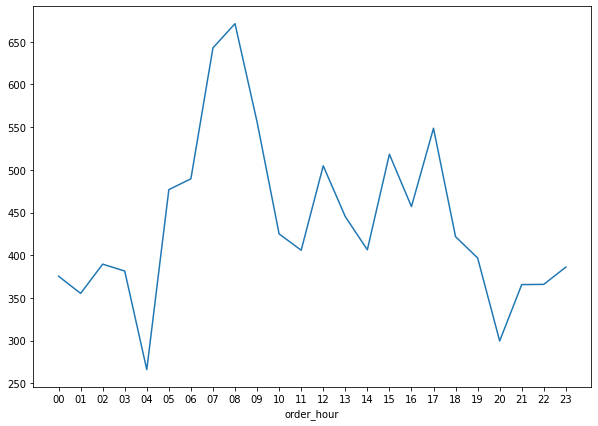

In [131]:
df_8.plot(kind='line',figsize=(10,7), xticks=range(0,24))